# <center> <font color = tomato> FIFA 19 PLAYER DATA BASE ANALYSIS


## <center> <font color = darkorange> Introduction
<font color=yellow> In this Python project, we will look for answers of the critical questions about FIFA 19 Player Database.


## <center> <font color = darkorange> Codebase


### <font color = darkorange> Import dependencies
<font color=yellow> We used 'pandas' library for data operations and 'pyplot' collection of 'matplotlib' library for visual figures


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### <font color = darkorange> Read database


In [2]:
players = pd.read_csv('data.csv', index_col = 0)
players.head()


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### <center><font color = darkorange> Question: Do only young players have potential of growth or are there aged players that can grow up?


<font color=yellow> To answer this question, we calculate player growths by subtracting current player overalls from their potentials.


In [3]:
players['Growth'] = players['Potential'] - players['Overall']
players[['Name', 'Overall', 'Potential', 'Growth']].head()


,Name,Overall,Potential,Growth
0,L. Messi,94,94,0
1,Cristiano Ronaldo,94,94,0
2,Neymar Jr,92,93,1
3,De Gea,91,93,2
4,K. De Bruyne,91,92,1


<font color=yellow> Then we calculate average growth of players at the same age.


Age
16    18.738095
17    17.934256
18    15.788251
19    13.563477
20    11.354839
21     9.477161
22     7.825373
23     6.310811
24     4.773196
25     3.316907
26     1.661860
27     0.759897
28     0.230699
29     0.111575
30     0.004362
31     0.000000
32     0.000000
33     0.000000
34     0.000000
35     0.000000
36     0.000000
37     0.000000
38     0.000000
39     0.000000
40     0.000000
41     0.000000
42     0.000000
44     0.000000
45     0.000000
Name: Growth, dtype: float64


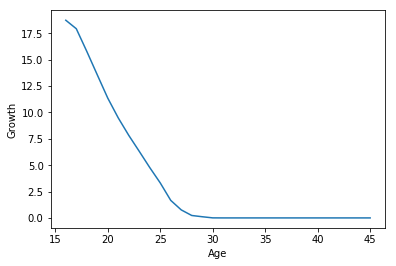

In [4]:
growth_by_age = players.groupby('Age')['Growth'].mean()
print(growth_by_age)
plt.xlabel('Age')
plt.ylabel('Growth')
plt.plot(growth_by_age)


<font color=yellow> As we consider players who are older than 25 as "aged", let's check aged players who can grow more than 4 points.


In [5]:
aged_players = players[players['Age'] > 25]
aged_players[players['Growth'] > 4][['Name', 'Overall', 'Potential', 'Growth']]


/Users/necati/PycharmProjects/fifa-19-player-database/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Name,Overall,Potential,Growth
438,G. Rulli,80,85,5
845,Sergi Gómez,78,83,5
1330,A. Izzo,76,81,5
1831,F. Schär,75,80,5
2415,A. Soumaoro,74,79,5
2945,Y. Gordillo,73,78,5
3276,F. Ceccherini,72,77,5
3697,A. Shabanov,72,77,5
3867,Luismi,72,77,5
4606,L. Lacroix,71,76,5


<font color=yellow> How about more than 5?


In [6]:
aged_players[players['Growth'] > 5][['Name', 'Overall', 'Potential', 'Growth']]


/Users/necati/PycharmProjects/fifa-19-player-database/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Name,Overall,Potential,Growth


<font color=yellow> Result: We can easily say that aged players does not have much potential to grow up besides a few.


### <center> <font color = darkorange> Question: Which countries have the best potentially growing players?


<font color = yellow> To answer this question, we find average growth of players in descending order.


In [7]:
players.groupby('Nationality')['Growth'].mean().sort_values(ascending = False)


Nationality
Indonesia               18.000000
Botswana                12.000000
Zambia                   8.555556
Dominican Republic       8.500000
Rwanda                   8.000000
Chad                     8.000000
Luxembourg               7.500000
Jordan                   7.000000
Moldova                  7.000000
Burundi                  7.000000
Tanzania                 7.000000
Afghanistan              6.750000
Cuba                     6.750000
Gambia                   6.733333
Nigeria                  6.719008
England                  6.607702
Switzerland              6.504545
Philippines              6.500000
Haiti                    6.500000
Denmark                  6.333333
Scotland                 6.290210
Canada                   6.281250
Norway                   6.275660
Kosovo                   6.242424
Mexico                   6.090164
Ghana                    6.043860
Republic of Ireland      6.002717
Hong Kong                6.000000
Cyprus                   6.000000
Ve

<font color=yellow> Result: Unless the expected, some less known countries have potentially growing players.


### <center> <font color = darkorange> Question: Are current clubs effective on players' value and wage?


<font color = yellow> To answer this question, we are going to need 'Value' and 'Wage' columns.


In [8]:
players[['Name', 'Value', 'Wage']].head()


,Name,Value,Wage
0,L. Messi,€110.5M,€565K
1,Cristiano Ronaldo,€77M,€405K
2,Neymar Jr,€118.5M,€290K
3,De Gea,€72M,€260K
4,K. De Bruyne,€102M,€355K


<font color = yellow> However, these columns are string. There is '€' character at the beginning and 'M' and 'K' characters for million and thousand at the end. We eliminate these characters and multiply values by proper multipliers.


In [9]:
for index, row in players.iterrows():
    players.at[index, 'Value (K€)'] = float(row['Value'].translate({ord(i): None for i in '€KM'})) * (1000 if "M" in row['Value'] else 1)
    players.at[index, 'Wage (K€)'] = float(row['Wage'].translate({ord(i): None for i in '€KM'})) * (1000 if "M" in row['Wage'] else 1)

players[['Name', 'Value', 'Value (K€)', 'Wage', 'Wage (K€)']].head()
    

,Name,Value,Value (K€),Wage,Wage (K€)
0,L. Messi,€110.5M,110500.0,€565K,565.0
1,Cristiano Ronaldo,€77M,77000.0,€405K,405.0
2,Neymar Jr,€118.5M,118500.0,€290K,290.0
3,De Gea,€72M,72000.0,€260K,260.0
4,K. De Bruyne,€102M,102000.0,€355K,355.0


<font color = yellow> Now we compare some players in similar conditions but in different clubs.


<font color = yellow> The first player grup has 75 overall, 23 years old central midfielders.


In [10]:
player_set = players[(players['Overall'] == 75) & (players['Age'] == 23) & (players['Position'] == 'CM')]
player_set[['Name', 'Club', 'Value', 'Wage']]


,Name,Club,Value,Wage
1584,Lucas Evangelista,FC Nantes,€9M,€21K
1687,A. Grassi,Parma,€9.5M,€43K
1898,D. Cataldi,Lazio,€8.5M,€35K
1903,M. Gaćinović,Eintracht Frankfurt,€9M,€26K


<font color = yellow> Let's check average player values of these clubs


In [11]:
players[players['Club'].isin(player_set['Club'])].groupby('Club')['Value (K€)', 'Wage (K€)'].mean()


,Value (K€),Wage (K€)
Club,,
Eintracht Frankfurt,6609.090909,23.363636
FC Nantes,4104.687500,15.812500
Lazio,11004.218750,38.312500
Parma,2860.172414,23.241379


<font color = yellow> The second player grup has 80 overall, 26 years old goalkeepers.


In [12]:
player_set = players[(players['Overall'] == 80) & (players['Age'] == 26) & (players['Position'] == 'GK')]
player_set[['Name', 'Club', 'Value', 'Wage']]


,Name,Club,Value,Wage
438,G. Rulli,Real Sociedad,€14M,€26K
447,Pacheco,Deportivo Alavés,€13M,€23K
463,N. Pope,Burnley,€13M,€48K


<font color = yellow> Let's check average player values of these clubs


In [13]:
players[players['Club'].isin(player_set['Club'])].groupby('Club')['Value (K€)', 'Wage (K€)'].mean()


,Value (K€),Wage (K€)
Club,,
Burnley,5616.818182,34.090909
Deportivo Alavés,6696.296296,17.592593
Real Sociedad,7454.354839,21.483871


<font color = yellow> The third player grup has 82 overall, 27 years old centre backs.


In [14]:
player_set = players[(players['Overall'] == 82) & (players['Age'] == 27) & (players['Position'] == 'CB')]
player_set[['Name', 'Club', 'Value', 'Wage']]


,Name,Club,Value,Wage
261,S. Sané,FC Schalke 04,€18.5M,€41K
273,Bartra,Real Betis,€21M,€32K


<font color = yellow> Let's check average player values of these clubs


In [15]:
players[players['Club'].isin(player_set['Club'])].groupby('Club')['Value (K€)', 'Wage (K€)'].mean()


,Value (K€),Wage (K€)
Club,,
FC Schalke 04,8597.068966,24.586207
Real Betis,11033.888889,22.925926


<font color=yellow> Result: As the examples have shown, there is no direct correlation between clubs and players' value and wage


### <center> <font color = darkorange> Question: Do current contract durations have impact on player wages and release clauses?


<font color = yellow> To answer this question, we calculate contract durations of players by substracting 2018 (Game Release Year) from 'Contract Valid Until' years.


In [16]:
players[['Name', 'Loaned From', 'Contract Valid Until']]


,Name,Loaned From,Contract Valid Until
0,L. Messi,NaN,2021
1,Cristiano Ronaldo,NaN,2022
2,Neymar Jr,NaN,2022
3,De Gea,NaN,2020
4,K. De Bruyne,NaN,2023
5,E. Hazard,NaN,2020
6,L. Modrić,NaN,2020
7,L. Suárez,NaN,2021
8,Sergio Ramos,NaN,2020
9,J. Oblak,NaN,2021


<font color = yellow> However, 'Contract Valid Until' fields of loaned players contain their return date as month-day-year format. As these fields do not show us their contract expire dates with their original clubs, these players are not useful for us. Therefore, we omit them.


In [17]:
player_set = players.copy()
player_set = player_set[pd.to_numeric(players['Contract Valid Until'], errors = 'coerce').notnull()]
player_set['Contract Valid Until'] = player_set['Contract Valid Until'].astype('int')
player_set['Contract Duration'] = player_set['Contract Valid Until'] - 2018
player_set[['Name', 'Loaned From', 'Contract Valid Until']]


,Name,Loaned From,Contract Valid Until
0,L. Messi,NaN,2021
1,Cristiano Ronaldo,NaN,2022
2,Neymar Jr,NaN,2022
3,De Gea,NaN,2020
4,K. De Bruyne,NaN,2023
5,E. Hazard,NaN,2020
6,L. Modrić,NaN,2020
7,L. Suárez,NaN,2021
8,Sergio Ramos,NaN,2020
9,J. Oblak,NaN,2021


<font color=yellow> Then we calculate average wages of players having the same contract duration.


Contract Duration
0     3.036117
1     6.363976
2     9.278123
3     9.788761
4    19.024374
5    15.769231
6    70.130435
7    45.000000
8    39.000000
Name: Wage (K€), dtype: float64


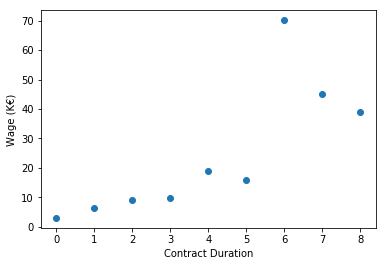

In [18]:
wages_by_contract_duration = player_set.groupby('Contract Duration')['Wage (K€)'].mean()
print(wages_by_contract_duration)
plt.xlabel('Contract Duration')
plt.ylabel('Wage (K€)')
plt.plot(wages_by_contract_duration, 'o')


<font color = yellow> To examine release clauses, we  need release clauses as numeric. We apply the same procedure as values and wages. However, some players may not have a release clause.


In [19]:
for index, row in player_set.iterrows():
    if isinstance(row['Release Clause'], str):
        player_set.at[index, 'Release Clause (K€)'] = float(row['Release Clause'].translate({ord(i): None for i in '€KM'})) * (1000 if "M" in row['Release Clause'] else 1)
        
player_set[['Name','Release Clause', 'Release Clause (K€)']]


,Name,Release Clause,Release Clause (K€)
0,L. Messi,€226.5M,226500.0
1,Cristiano Ronaldo,€127.1M,127100.0
2,Neymar Jr,€228.1M,228100.0
3,De Gea,€138.6M,138600.0
4,K. De Bruyne,€196.4M,196400.0
5,E. Hazard,€172.1M,172100.0
6,L. Modrić,€137.4M,137400.0
7,L. Suárez,€164M,164000.0
8,Sergio Ramos,€104.6M,104600.0
9,J. Oblak,€144.5M,144500.0


<font color=yellow> Then we calculate average release clauses of players having the same contract duration. 


Contract Duration
0     1318.914221
1     2263.783963
2     3954.887261
3     4828.990133
4    10446.252203
5     9847.124643
6    50408.695652
7    35148.000000
8    54350.000000
Name: Release Clause (K€), dtype: float64


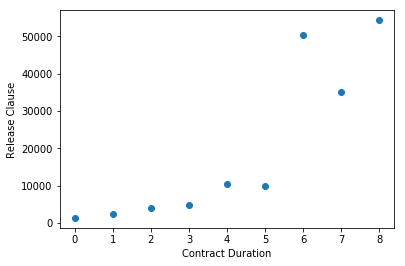

In [21]:
release_clauses_by_contract_duration = player_set.groupby('Contract Duration')['Release Clause (K€)'].mean()
print(release_clauses_by_contract_duration)
plt.xlabel('Contract Duration')
plt.ylabel('Release Clause')
plt.plot(release_clauses_by_contract_duration, 'o')


<font color=yellow> Result: Players having long term contract with their club generally have higher wages and release clauses.


### <center> <font color = darkorange> Question: Which jersey numbers the best players have picked?


<font color = yellow> To answer this question, we count the most selected jersey numbers by best players. We considered players having more than 75 overall are "the best".


In [22]:
players[players['Overall'] >= 75].groupby('Jersey Number')['Jersey Number'].count().sort_values(ascending = False).head()


Jersey Number
10.0    128
8.0     109
7.0     101
1.0      98
11.0     95
Name: Jersey Number, dtype: int64

<font color=yellow> Result: Best players mostly choose 10, 8 and 7 jersey numbers.


### <center> <font color = darkorange> Question: Are player clubs are effective on potential growths?


<font color = yellow> To answer this question, we find average growth of players being younger than 25 years old of the clubs.


In [23]:
players[players['Age'] <= 25].groupby('Club')['Growth'].mean().sort_values(ascending = False)


Club
Crewe Alexandra               13.200000
Stabæk Fotball                13.090909
Leeds United                  12.611111
Galatasaray SK                12.500000
Melbourne City FC             12.400000
Independiente Medellín        12.333333
Rosenborg BK                  12.076923
Derry City                    12.066667
FC Zürich                     12.058824
SK Sturm Graz                 12.000000
Colo-Colo                     11.933333
Stoke City                    11.916667
FC Bayern München             11.875000
Bray Wanderers                11.823529
Alanyaspor                    11.777778
Aberdeen                      11.764706
Vålerenga Fotball             11.764706
FC Nordsjælland               11.720000
Heart of Midlothian           11.687500
Manchester City               11.650000
Odds BK                       11.600000
Shamrock Rovers               11.562500
AC Ajaccio                    11.555556
FC Basel 1893                 11.529412
Aston Villa                   11.50

<font color=yellow> Result: Unless the expected, some less known clubs have potentially growing young players.


### <center> <font color = darkorange> Question: In the same value and wage boundary, what would be the most important 3 attributes of a player while buying a player?


<font color = yellow> To answer this question, we examined players around mean value and wage. 


In [24]:
average_value = players['Value (K€)'].mean()
average_wage = players['Wage (K€)'].mean()
players[(average_value - 100 <= players['Value (K€)']) & (players['Value (K€)'] <= average_value + 100) & (average_wage - 1 <= players['Wage (K€)']) & (players['Wage (K€)'] <= average_wage + 1)].sort_values(by = 'Potential', ascending = False)[['Name', 'Age', 'Overall', 'Potential', 'Club', 'Value' ,'Wage', 'Contract Valid Until', 'Release Clause']]


,Name,Age,Overall,Potential,Club,Value,Wage,Contract Valid Until,Release Clause
5613,E. Löwen,21,70,80,1. FC Nürnberg,€2.5M,€9K,2022,€5M
5480,M. Ingvartsen,22,70,77,KRC Genk,€2.5M,€9K,2021,€4.3M
5273,Marc Gual,22,70,77,Real Zaragoza,€2.5M,€9K,"Jun 30, 2019",NaN
4247,E. Horvath,23,71,77,Club Brugge KV,€2.4M,€9K,2021,€4M
5389,D. Milošević,23,70,75,Atiker Konyaspor,€2.4M,€9K,2019,€4.9M
5174,G. Kerk,22,70,75,FC Utrecht,€2.4M,€10K,2022,€3.8M
5159,Wei Shihao,23,70,75,Beijing Sinobo Guoan FC,€2.4M,€9K,2021,€5.4M
5072,L. Ajorque,24,70,75,RC Strasbourg Alsace,€2.4M,€10K,2022,€5M
4951,C. Dessers,23,70,75,FC Utrecht,€2.4M,€10K,2020,€3.8M
4857,C. Şahin,23,70,75,FC St. Pauli,€2.4M,€9K,2021,€4M


<font color=yellow> Result: At the same value and wage boundary, player overalls are generally close to each other. However, we can see huge differences on potentials especially on young players. Therefore, we can consider 'Potential' and 'Age' as top 2. On the other hand, we can see differences on release clauses despite the players' same value. Therefore, we can say that 'Release Clause' is the third most important attribute.


### <center> <font color = darkorange> Bonus Question: Messi or Ronaldo?


In [25]:
players[(players['Name'] == 'L. Messi') | (players['Name'] == 'Cristiano Ronaldo')]


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Growth,Value (K€),Wage (K€)
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,0,110500.0,565.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,0,77000.0,405.0


<font color=yellow> It is really hard to make decision between them. Instead, let's discuss and compare their attributes and leave the decision to the player.
* They both has the same overall however Messi is much more expensive player as value, release clause and wage.
* They both are old players however Messi is 2 years younger than Ronaldo. This gives a little advantage about retirement time.
* Ronaldo has 5 star skill but Messi has 4. This means Ronaldo can make more special movement during the game.
* Ronaldo has "High/Low" workrate which means he tends to attack more but does not like helping the defence. Messi has "Medium/Medium" workrate which means he has balanced attack and defence tendencies.
* Messi generally plays on wings but Ronaldo was considered as centre forward lately.
* Ronaldo is taller and has more physical attributes which means he has better headers and more powerful on sholder to sholder interferences. Messi is more lightweight but has great dribbling skills. If player likes distant dribbles, Messi is the great choice.
* Messi has much better free kick skills than Ronaldo.


## <center> <font color = darkorange> Conclusion
<font color=yellow> We have examined the FIFA 19 Player Database as asking some critial questions and we reached some conclusions. Gamers should pay attention to these while buying players to their teams in FIFA 19 Career Mode:
* Young players should be chosen because of cheap prices and great growth ratios.
* There is no such rule like best players only occur from well known teams and countries. There are many talents waiting to be discovered in the less known teams and countries. Go search them.
* Try to find players who have less contract duration because their release clauses are less and they can be bought much cheaper.
* Reserv 10, 8 and 7 jersey numbers for your best players because they like and deserve some special treatment.